In [2]:
import json
import os
import PIL as pl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display


In [ ]:
(X_train1, y_train1), (X_test1,y_test1) = keras.datasets.cifar10.load_data()

print(len(X_train1))

50000


In [23]:
imageWidth = 300
imageheight = 300

def generateBoxesImages():
# Iterate JSON file to find boxes  
    with open('annotations.json') as data_file:    
        data = json.load(data_file)
    for filepath, values in data.items():
        imagename = os.path.basename(filepath)
        imagename = os.path.splitext(imagename)[0]
        if imagename != 'urlImage':
            pil_image =pl.Image.open('../inputImages/'+imagename+'.png').resize((imageWidth, imageheight),pl.Image.ANTIALIAS)

            for coordinates in values.values():
                x1 = coordinates.get('x1')
                x2 = coordinates.get('x2')
                y1 = coordinates.get('y1')
                y2 = coordinates.get('y2')
                category = coordinates.get('category')
            # crop images based on the boxes coordinates and save them to new images
            im = pil_image.convert("RGB")
            im = im.crop((int(x1), int(y1), int(x2), int(y2)))
            im.save(
            "../img/"+category+'/'
            + imagename
            + '-'+category+ '-'
            + x1 + "x" + y1
            + "-"+ x2+ "x"+ y2
            + ".png"
            )
generateBoxesImages()

In [24]:
img_dataGen = ImageDataGenerator(validation_split=0.2, rotation_range=40, 
rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
fill_mode='nearest')

train_generator = img_dataGen.flow_from_directory(directory='../img',target_size=(120,120),
color_mode='rgb', seed = 42, class_mode = 'binary', subset='training', batch_size=32)

valid_generator = img_dataGen.flow_from_directory(directory='../img',target_size=(120,120),
color_mode='rgb', class_mode = 'binary', shuffle = True, subset='validation', batch_size=32)

imgs, labels = next(train_generator)


Found 84 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [25]:
model = Sequential(
    [
        Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", input_shape=(120, 120, 3), padding='same'
        ),
        MaxPool2D((2, 2), strides=2),

        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='same'),
        MaxPool2D((2, 2), strides=2),

        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
        MaxPool2D((2, 2), strides=2),

        Flatten(),
        Dense(units=64, activation="relu"),
        Dense(units=1, activation="sigmoid")
    ])

model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator,epochs=30, validation_data=valid_generator)


Epoch 1/30
3/3 [==============================] - 2s 687ms/step - loss: 0.6912 - accuracy: 0.4643 - val_loss: 0.6990 - val_accuracy: 0.4286
Epoch 2/30
3/3 [==============================] - 1s 436ms/step - loss: 0.6759 - accuracy: 0.5833 - val_loss: 0.6898 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 1s 372ms/step - loss: 0.6706 - accuracy: 0.6190 - val_loss: 0.7006 - val_accuracy: 0.4762
Epoch 4/30
3/3 [==============================] - 1s 482ms/step - loss: 0.6610 - accuracy: 0.6905 - val_loss: 0.6846 - val_accuracy: 0.5238
Epoch 5/30
3/3 [==============================] - 1s 331ms/step - loss: 0.6558 - accuracy: 0.6548 - val_loss: 0.7218 - val_accuracy: 0.4286
Epoch 6/30
3/3 [==============================] - 1s 359ms/step - loss: 0.6333 - accuracy: 0.6667 - val_loss: 0.6839 - val_accuracy: 0.5714
Epoch 7/30
3/3 [==============================] - 1s 341ms/step - loss: 0.6402 - accuracy: 0.6190 - val_loss: 0.6876 - val_accuracy: 0.5714
Epoch 8/30
3/3 [====

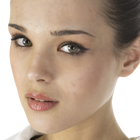



The person is not wearing a mask.



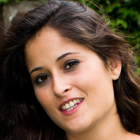



The person is not wearing a mask.



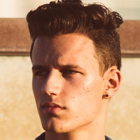



The person is not wearing a mask.



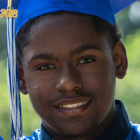



The person is not wearing a mask.



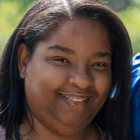



The person is not wearing a mask.



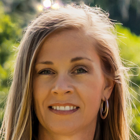



The person is not wearing a mask.



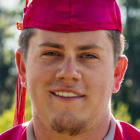



The person is not wearing a mask.



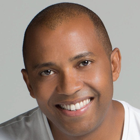



The person is not wearing a mask.



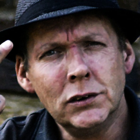



The person is not wearing a mask.



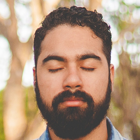



The person is not wearing a mask.



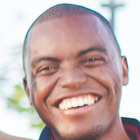



The person is not wearing a mask.



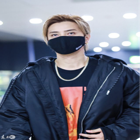



The person is wearing a mask. 



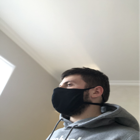



The person is wearing a mask. 



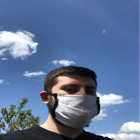



The person is wearing a mask. 



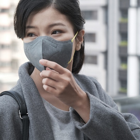



The person is wearing a mask. 



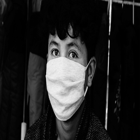



The person is wearing a mask. 



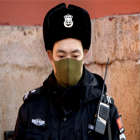



The person is wearing a mask. 



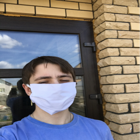



The person is wearing a mask. 



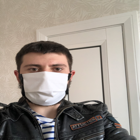



The person is wearing a mask. 



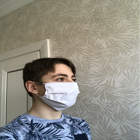



The person is wearing a mask. 



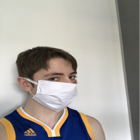



The person is wearing a mask. 



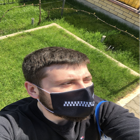



The person is wearing a mask. 



In [29]:
history
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1,23):
  img_directory = '../testImages/'+str(i) + '.png'
  img_pred = image.load_img(img_directory, target_size = (120, 120))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  img = pl.Image.open(img_directory)
  resized_img = img.resize((140, 140))

  display(resized_img)
  print("\n")
  if(int(prediction[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")

In [ ]:
y_train[:5]

train = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/30
1/1 [==============================] - 0s 108ms/step - loss: 0.0536 - accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 86ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 95ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 108ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 103ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 116ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 119ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 115ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 119ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 112ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 11/30
1/1 [====